In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
dataset = pd.read_csv('CFS_dataset.csv')

In [64]:
dataset.head(5)

,initially failed lines,failed lines after cascade,Cmax,Cmin,loadshedding constraint,loading ratio,capacity estimation error,flow capacity,Island?,degree,distance,installed cap,Load shedd,Load shedd.1,demand,served,HEP,generated,Alpha,failed lines due to cascade
0,6,86,200,50,0.45,0.90,0.50,768,0,2.675,7.397,1550,6307,6307,8970.0,2663.0,0.50,2663.0,0.2,80
1,4,52,200,100,0.05,0.85,0.20,209,0,2.699,6.912,450,2934,2934,8471.0,5537.0,0.50,5538.0,0.2,48
2,7,17,200,100,0.40,0.75,0.01,537,0,2.663,6.951,1050,700,700,7475.0,6775.0,0.50,6774.0,0.2,10
3,9,9,200,50,0.30,0.90,0.05,526,0,2.638,7.048,850,1507,1507,8970.0,7463.0,0.29,7462.0,0.2,0
4,3,82,200,50,0.05,0.85,0.35,149,0,2.712,6.855,300,3534,3534,8471.0,4937.0,0.72,4937.0,0.2,79


In [65]:
dataset.tail(2)

,initially failed lines,failed lines after cascade,Cmax,Cmin,loadshedding constraint,loading ratio,capacity estimation error,flow capacity,Island?,degree,distance,installed cap,Load shedd,Load shedd.1,demand,served,HEP,generated,Alpha,failed lines due to cascade
37215,2,50,100,100,0.35,0.90,0.25,157,0,2.723926,6.907445,300,6166,6166,8969.58,2803.58,0.975848,2803.386039,0.15,48
37216,3,3,50,50,0.50,0.85,0.05,93,0,2.711656,6.895251,200,2098,2098,8471.27,6373.27,0.834725,6373.464346,0.10,0


- The dataset contains two instances of loadshed. I'll abandon that column now.

In [66]:
dataset.columns

Index(['initially failed lines', 'failed lines after cascade', 'Cmax', 'Cmin',
       'loadshedding constraint', 'loading ratio', 'capacity estimation error',
       'flow capacity', 'Island?', 'degree', 'distance', 'installed cap',
       'Load shedd', 'Load shedd.1', 'demand', 'served', 'HEP', 'generated',
       'Alpha', 'failed lines due to cascade'],
      dtype='object')

- There is inconsistency in the dataset's column names. I must therefore rename them to avoid confusion.

In [67]:
dataset.rename(columns={'initially failed lines': 'Intial_failed_lines', 
                       'failed lines after cascade':'Failed_lines_after_cascade_ends',
                        'loadshedding constraint': 'Load_shedding_constraint',
                        'loading ratio': 'Load_generation_ratio',
                        'capacity estimation error':'Capacity_estimation_error',
                        'flow capacity':'Flow_capacity','degree':'Degree', 'distance':'Distance',
                        'installed cap':'Installed_capacity',
        'demand':'Demand', 'served':'Served', 'HEP':'Human_error_Probability', 'generated':'Generation',
        'failed lines due to cascade':'Failed_lines_due_to_cascade'
                       },inplace=True)

In [68]:
dataset.shape

(37217, 20)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37217 entries, 0 to 37216
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Intial_failed_lines              37217 non-null  int64  
 1   Failed_lines_after_cascade_ends  37217 non-null  int64  
 2   Cmax                             37217 non-null  int64  
 3   Cmin                             37217 non-null  int64  
 4   Load_shedding_constraint         37217 non-null  float64
 5   Load_generation_ratio            37217 non-null  float64
 6   Capacity_estimation_error        37217 non-null  float64
 7   Flow_capacity                    37217 non-null  int64  
 8   Island?                          37217 non-null  int64  
 9   Degree                           37217 non-null  float64
 10  Distance                         37217 non-null  float64
 11  Installed_capacity               37217 non-null  int64  
 12  Load shedd        

Since the dataset was generated from simulation, there should be no missing values in the dataset. We can confirm from above that there are no missing values in the dataset.

### Data cleaing and wranling 

- Load shedd and Load shedd.1 are same so remove Load shedd.1 

In [70]:
dataset.drop('Load shedd.1',axis=1,inplace=True)

In [71]:
dataset.rename(columns={'Load shedd':'Loadshed'},inplace=True)
dataset.head(2)

,Intial_failed_lines,Failed_lines_after_cascade_ends,Cmax,Cmin,Load_shedding_constraint,Load_generation_ratio,Capacity_estimation_error,Flow_capacity,Island?,Degree,Distance,Installed_capacity,Loadshed,Demand,Served,Human_error_Probability,Generation,Alpha,Failed_lines_due_to_cascade
0,6,86,200,50,0.45,0.90,0.5,768,0,2.675,7.397,1550,6307,8970.0,2663.0,0.5,2663.0,0.2,80
1,4,52,200,100,0.05,0.85,0.2,209,0,2.699,6.912,450,2934,8471.0,5537.0,0.5,5538.0,0.2,48


In order to determine whether there are any discrepancies, I will now review the summary statistic and the correlation between the variables.

In [72]:
dataset_describe = dataset.describe().transpose()

In [73]:
dataset_describe = dataset_describe.drop('count',axis =1)

In [74]:
round (dataset_describe,2)

,mean,std,min,25%,50%,75%,max
Intial_failed_lines,6.00,2.58,2.00,4.00,6.00,8.00,10.00
Failed_lines_after_cascade_ends,41.26,22.18,2.00,26.00,47.00,56.00,104.00
Cmax,198.07,172.92,50.00,100.00,200.00,200.00,800.00
Cmin,65.25,35.00,50.00,50.00,50.00,50.00,800.00
Load_shedding_constraint,0.20,0.14,0.01,0.10,0.20,0.30,0.50
Load_generation_ratio,0.72,0.14,0.50,0.60,0.70,0.85,0.99
Capacity_estimation_error,0.20,0.14,0.01,0.10,0.20,0.30,0.50
Flow_capacity,426.75,255.89,0.00,224.00,390.00,585.00,1895.00
Island?,0.00,0.04,0.00,0.00,0.00,0.00,1.00
Degree,2.67,0.03,2.63,2.65,2.67,2.70,2.74


It is now necessary to determine if each column in the dataset is pertinent. In order to accomplish that, we may use Seaborn Visualization to examine the correlation and correlation heatmap.

In [75]:
correlation = round(dataset.corr(),2)

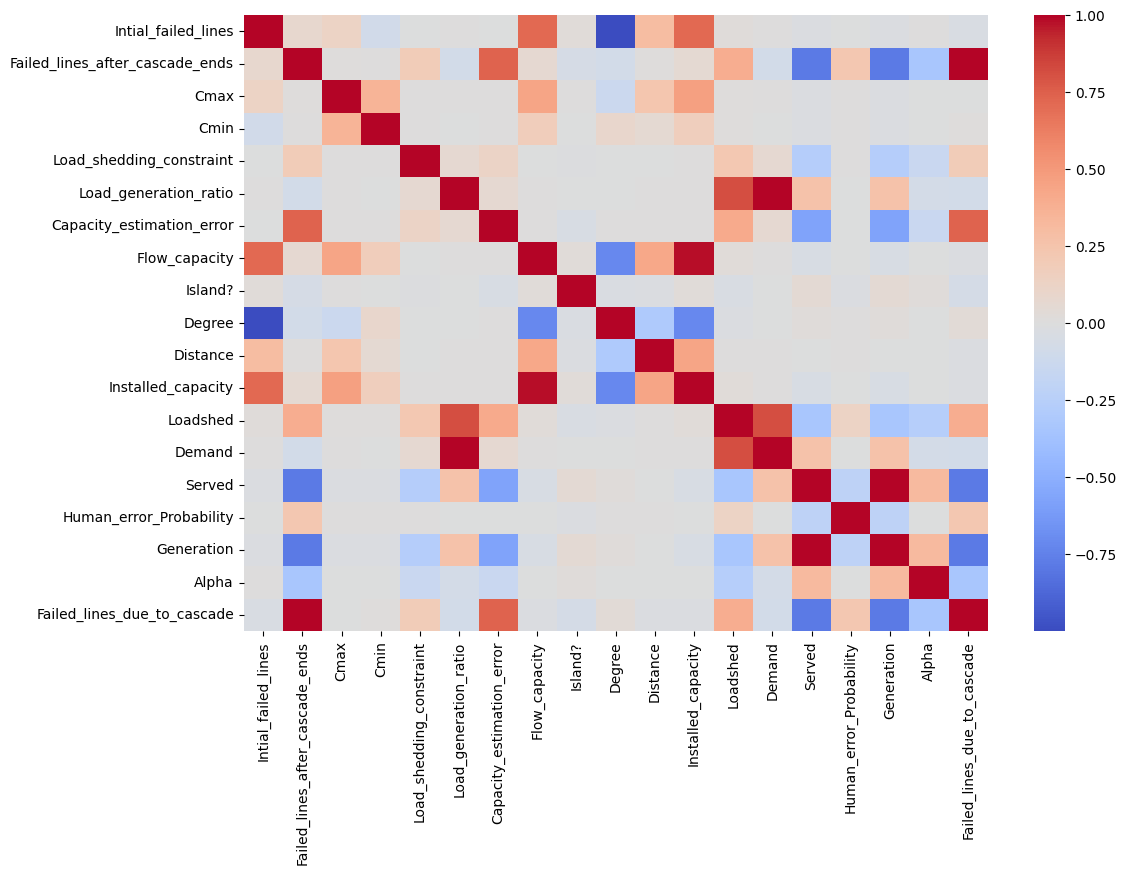

In [76]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(),cmap ='coolwarm',)
plt.savefig('heatmap.png', format='png',bbox_inches='tight')

We can remove the following columns from the dataset:

- The difference between served loads and demand loads is used to compute loadshed. To prevent colinearity, we must eliminate the served and demand columns. 
- Since the value counts are primarily 0 and do not correspond with the failed lines as a result of cascade, island columns can be eliminated.  
Our goal is to forecast failed lines as a result of cascade. Thus, to prevent colinearity, we should eliminate failed lines after the cascade con.
- We must eliminate the flow capacity via the lines in order to forecast the cascade from established capacities.

In [77]:
dataset['Island?'].value_counts()

0    37152
1       65
Name: Island?, dtype: int64

Text(0, 0.5, 'Count')

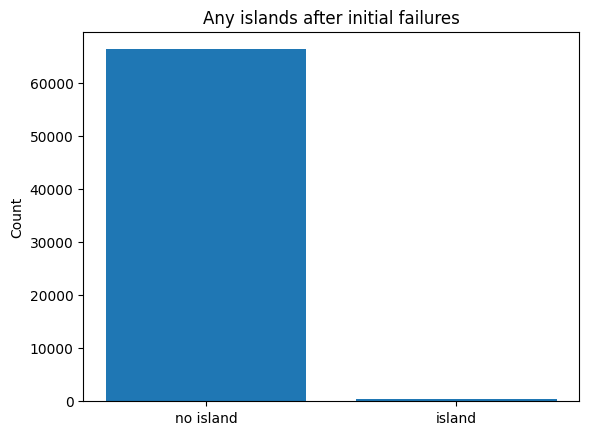

In [78]:
plt.bar(['no island','island'],[66388,429])
plt.title('Any islands after initial failures')
plt.ylabel('Count')

In [79]:
dataset.drop(['Island?','Served','Demand','Failed_lines_after_cascade_ends','Flow_capacity'],axis=1,inplace=True)

Here, anticipating cascade failures is our goal. Loadshed and Failed lines due to cascade are the output variables in the dataset. A normalized cascading effect variable is defined as the linear sum of the loadshed and failed lines as a result of cascading. 

In [80]:
scaler = MinMaxScaler()
Scaled_data = scaler.fit_transform(dataset[['Loadshed','Failed_lines_due_to_cascade']])

- Following data normalization, we compute the cascading effect by combining the Loadshed and Failed lines due to cascade, and then we enter the result into the dataframe.

In [81]:
scaled_df = pd.DataFrame(Scaled_data)
scaled_df['Cascading effect'] = 0.5*scaled_df[0]+0.5*scaled_df[1]
dataset =pd.concat((dataset,scaled_df['Cascading effect']),axis =1)

In [82]:
dataset.head()

,Intial_failed_lines,Cmax,Cmin,Load_shedding_constraint,Load_generation_ratio,Capacity_estimation_error,Degree,Distance,Installed_capacity,Loadshed,Human_error_Probability,Generation,Alpha,Failed_lines_due_to_cascade,Cascading effect
0,6,200,50,0.45,0.90,0.50,2.675,7.397,1550,6307,0.50,2663.0,0.2,80,0.766667
1,4,200,100,0.05,0.85,0.20,2.699,6.912,450,2934,0.50,5538.0,0.2,48,0.412819
2,7,200,100,0.40,0.75,0.01,2.663,6.951,1050,700,0.50,6774.0,0.2,10,0.090929
3,9,200,50,0.30,0.90,0.05,2.638,7.048,850,1507,0.29,7462.0,0.2,0,0.083629
4,3,200,50,0.05,0.85,0.35,2.712,6.855,300,3534,0.72,4937.0,0.2,79,0.607574


### Data narrative and visualization

* I would utilize a variety of visualization approaches in this part to pinpoint the crucial elements for cascading failures. By examining the heatmap, we may immediately obtain a very accurate estimate. Since the Cascading_effect was computed as a linear combination of the Loadshed and Failed lines owing to cascade, for instance, they would have a significant correlation with it. Both the loadshed and failing lines due to cascade and the cascading impact slots in the heatmap are highlighted in red, signifying a strong positive link.

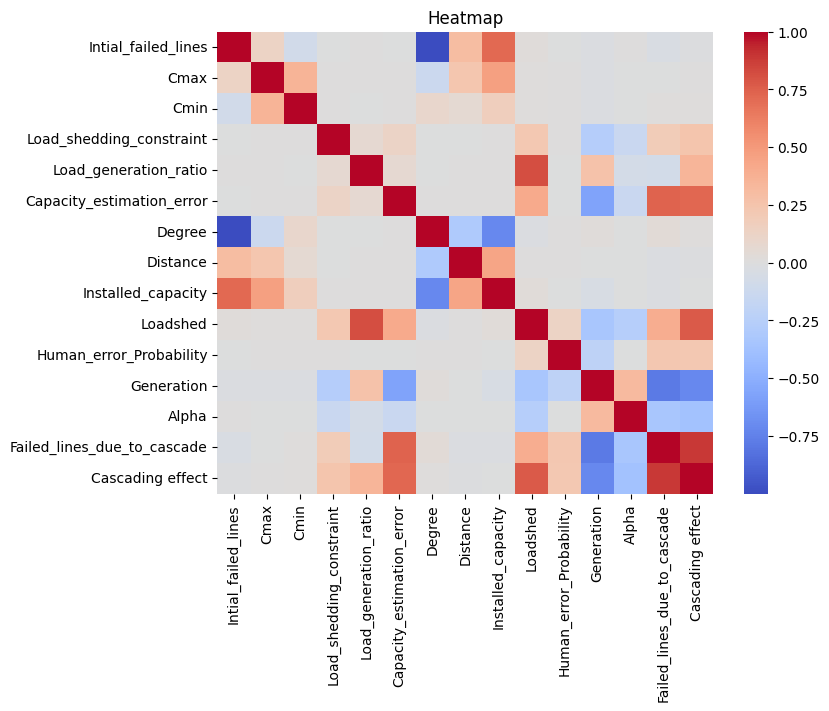

In [83]:
plt.subplots(figsize=(8,6))
sns.heatmap(dataset.corr(),cmap ='coolwarm',)
plt.title('Heatmap')
plt.savefig('heatmap.png', format='png',bbox_inches='tight')

The figure above represents the updated heatmap plot after removing unwanted columns.

In [84]:
dataset.rename(columns ={'Cascading effect':'Cascading_effect'},inplace = True)

- Let us first examine the dataset's histograms. 

- Examining the cascading effect histogram. It is evident that the histogram appears to be bimodal. For the set of feature values, no cascading happened in the zone indicated by the first choice, which also shows that no loads were shed and no additional transmission liens failed as a result of cascade. In a similar vein, the second choice shows that the average cascading effect happened at 0.35.

- It makes sense that the load-shedding histogram is slightly skewed to the left. This suggests that there is a lower chance of a significant cascading failure happening. Additionally, this suggests that the matpower optimal power flow (OPF) is effectively reducing the loads in order to reduce the increased chance of a cascading failure. 


- The aforementioned claim is further supported by the histogram of faulty transmission lines caused by cascade. The histogram shows that, broadly speaking, 20% of the samples have about 13500 points with zero extra failures. Only minimal or nonexistent load shedding and no further line failures occurred in those 20% of the samples.  It should be noted that we maintained the load-shedding optimization constraint parameters at zero during the data gathering phase.

- Lastly, the frequency distribution of the simulation's human mistake probability is displayed in the bottom right histogram. Based on the performance attributes of the operators and their distribution, the chance of human mistake was computed. Previous research work used the SPAR-H methodology to quantify the distribution of human operator errors from operator interviews.

Text(0.5, 1.0, "The samples' distribution of the chance of human mistake")

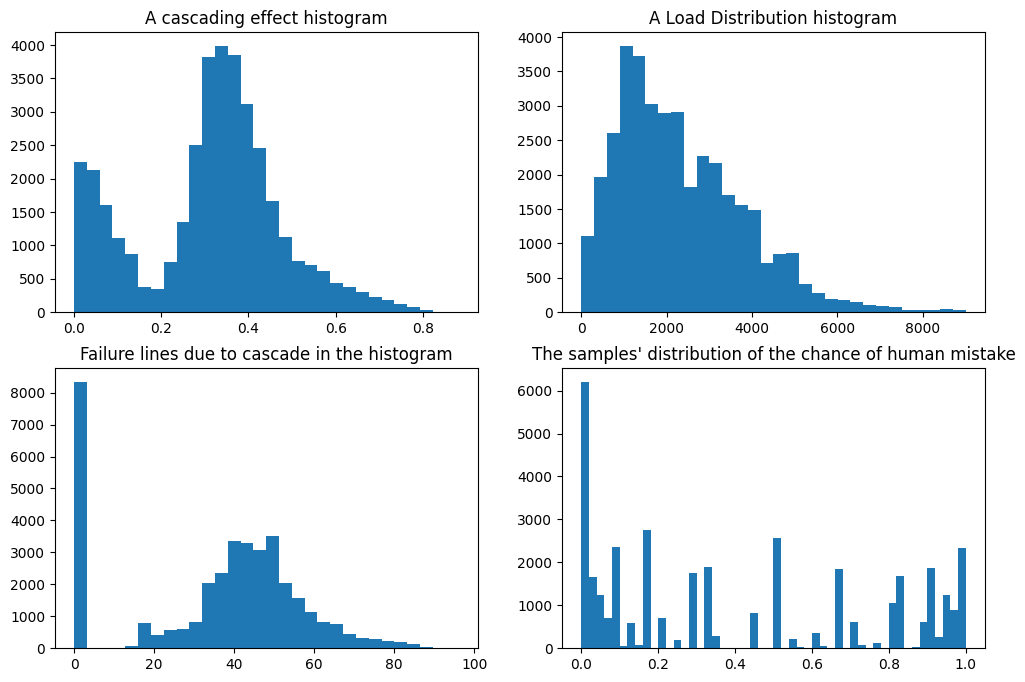

In [85]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(dataset.Cascading_effect, bins =30)
plt.title('A cascading effect histogram')
plt.subplot(2,2,2)
plt.hist(dataset.Loadshed,bins =30,cumulative=False,histtype='bar')
plt.title('A Load Distribution histogram')
plt.subplot(2,2,3)
plt.hist(dataset.Failed_lines_due_to_cascade,bins =30)
plt.title('Failure lines due to cascade in the histogram')
plt.subplot(2,2,4)
dataset.Human_error_Probability.hist(bins = 50, grid = False)
plt.title("The samples' distribution of the chance of human mistake")

- To capture the impact of human errors on cascading failure, we first calculated the human error probability as previously mentioned. Then, using a small set of rules, we modified the status power grid (represented by the load-generation ratio, load shedding constrain, and capacity estimation error) and embedded it into the simulation.

Let us now examine some boxplots to visualize the combined relationships among a few variables.

In [86]:
dataset.columns

Index(['Intial_failed_lines', 'Cmax', 'Cmin', 'Load_shedding_constraint',
       'Load_generation_ratio', 'Capacity_estimation_error', 'Degree',
       'Distance', 'Installed_capacity', 'Loadshed', 'Human_error_Probability',
       'Generation', 'Alpha', 'Failed_lines_due_to_cascade',
       'Cascading_effect'],
      dtype='object')

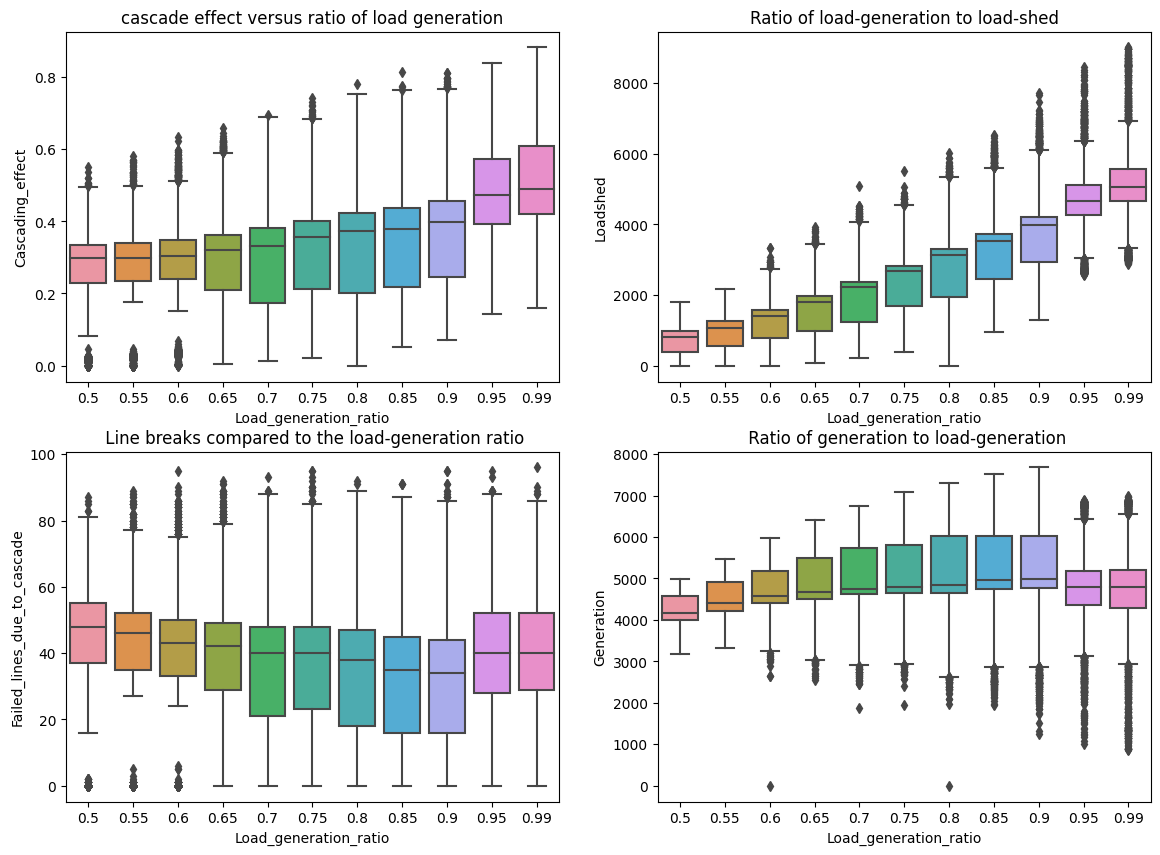

In [87]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.title('cascade effect versus ratio of load generation')
sns.boxplot(y = 'Cascading_effect', x ='Load_generation_ratio', data=dataset)

plt.subplot(2,2,2)
plt.title('Ratio of load-generation to load-shed')
sns.boxplot(y = 'Loadshed', x ='Load_generation_ratio', data=dataset)
plt.subplot(2,2,3)
plt.title(' Line breaks compared to the load-generation ratio')
sns.boxplot(y = 'Failed_lines_due_to_cascade', x ='Load_generation_ratio', data=dataset)
plt.subplot(2,2,4)
plt.title(' Ratio of generation to load-generation')
sns.boxplot(y = 'Generation', x ='Load_generation_ratio', data=dataset)

plt.savefig('Comparison of the load-generation and load-shedding ratio.png', format='png',bbox_inches='tight')

- The charts above illustrate how changes in the load-generation ratio affect several factors. The ratio of load demand to maximum generation is known as the load-generation ratio. This number, which can vary from 0 to 1, represents the grid's stress. It makes sense that a high load-generation ratio would put more strain on the grid in order to service more users, which would raise the possibility of a cascade collapse. The load-generation ratios in this case ranged from 0.5 to 0.99.

- The graphic in the upper left corner demonstrates how the load-generation ratio increases along with the average cascading impact.

- Contrary to what one might anticipate, load-shedding increases with load-generation ratio, as shown by subplots 2 and 3. This is because failed lines resulting from load-shedding and cascade should likewise increase with load-generation ratio. However, it's noteworthy to note that line failures are somewhat declining. The majority of research studies assume that when demand rises, there is a high probability of an increase in line failures and do not take load-shedding into account as a parameter. Load-shedding is used in our simulations to reduce line and cascading failures. Therefore, in order to reduce the number of transmission line failures, the grid engages in more load-shedding when it is under stress.

- As previously mentioned, we left the load-shedding cost settings in the simulations unchanged. This is visible when looking at the bottom-right plot. Power generation did not increase as much with the increase in the load-generation ratio (highest achievable generation 9966MW). This suggests that, on average, load-shedding is less expensive than generation in the chosen context.  

Text(0.5, 1.0, 'quantity of load-shed compared to load-shedding capacity')

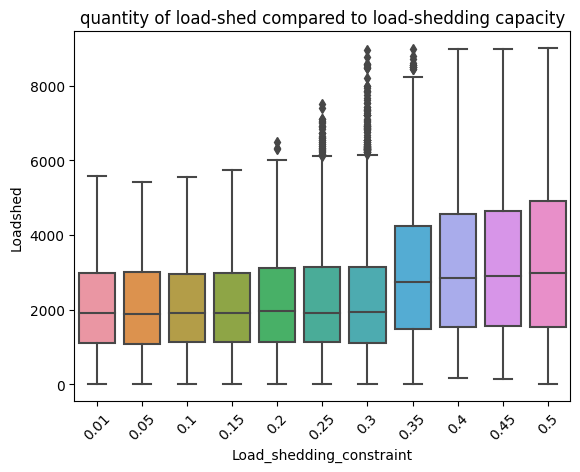

In [88]:
chart= sns.boxplot(x='Load_shedding_constraint',y='Loadshed', data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('quantity of load-shed compared to load-shedding capacity')

The boxplot seen above highlights a noteworthy finding. For load-shedding constraint values ranging from 0 to 0.5, the average amount of loadshed is comparatively constant. However, with load-shedding constraint values >0.5, it increases exponentially. After doing a thorough study, I discovered that the OPF is shedding loads in accordance with cost setting, and that we are permitting more and load loads to participate in load shedding when the load-shedding constraint is quite high.

Text(0.5, 1.0, 'mistake in capacity calculation versus load shedding')

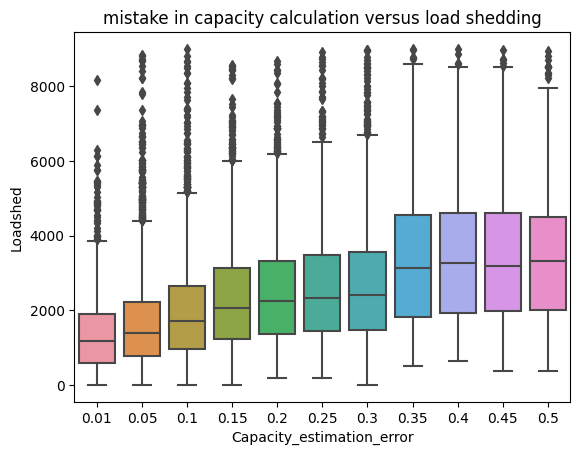

In [89]:
sns.boxplot(x=dataset.Capacity_estimation_error,y=dataset.Loadshed)
plt.title ('mistake in capacity calculation versus load shedding')

We observe from the boxplot above that the amount of load-shedding increases with capacity estimation errors.

<Axes: title={'center': 'Alpha vs load-shed'}, xlabel='Alpha', ylabel='Loadshed'>

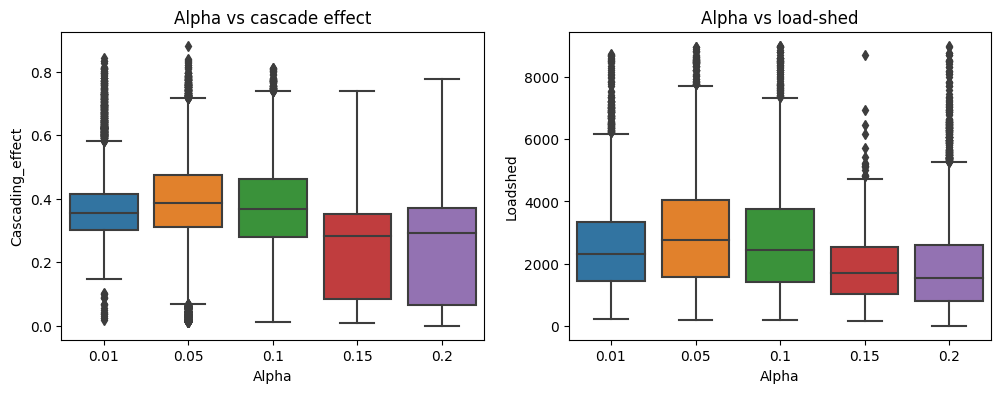

In [90]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Alpha vs cascade effect')

sns.boxplot(x=dataset.Alpha,y=dataset.Cascading_effect)
plt.subplot(1,2,2)
plt.title('Alpha vs load-shed')

sns.boxplot(x=dataset.Alpha,y=dataset.Loadshed)

The purpose of the parameter alpha is to change how overloading affects the transmission lines. In order to handle overloading, transmission lines with a higher alpha value have more buffer capacity.  when predicted, when alpha increases, so do the loadshed and cascade impact amounts.

<Axes: xlabel='Loadshed', ylabel='Generation'>

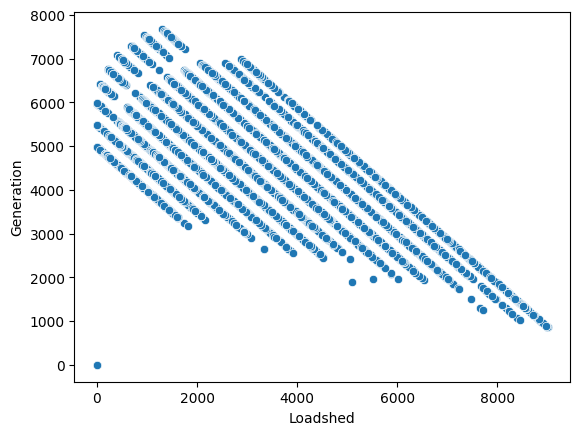

In [91]:
sns.scatterplot(x=dataset.Loadshed, y=dataset.Generation)

The scatterplot above illustrates the negative linear relationship between load shedding and generation. To prevent colinearity, we must eliminate generation from the feature set.

Text(0.5, 1.0, 'degree vs cascading effect')

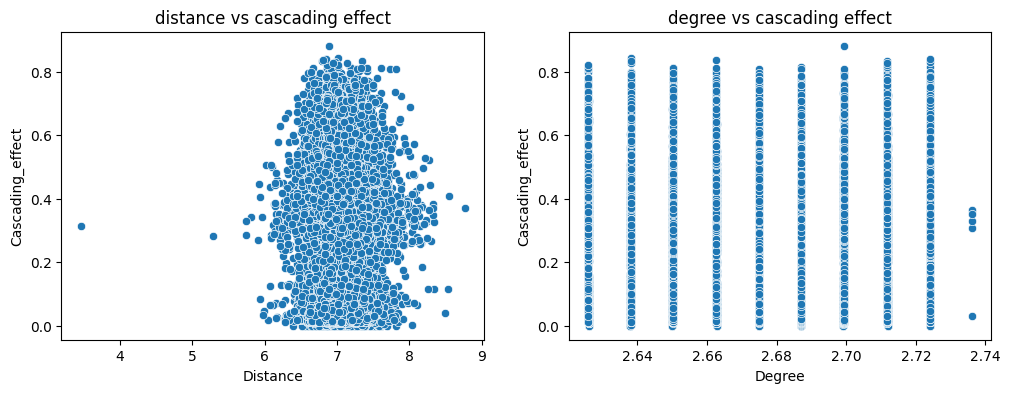

In [92]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=dataset.Distance,y=dataset.Cascading_effect)
plt.title('distance vs cascading effect')
plt.subplot(1,2,2)
sns.scatterplot(x=dataset.Degree, y=dataset.Cascading_effect)
plt.title('degree vs cascading effect')


The plots above represent the effect of topological variables on cascading failures. There are no visible patterns between degree and distance with cascading failure. We can remove these two features from the data set as well. But I will keep them for now and may delete them during model tuning.

Text(0.5, 1.0, 'degree vs cascading effect')

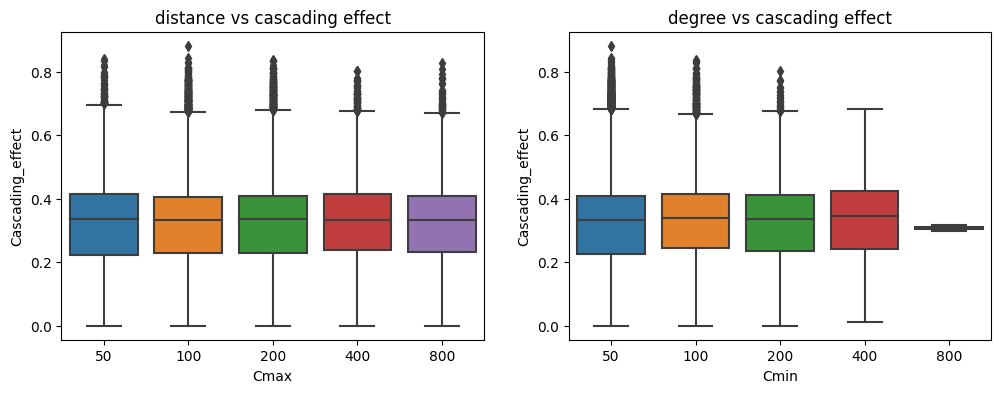

In [93]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=dataset.Cmax,y=dataset.Cascading_effect)
plt.title('distance vs cascading effect')
plt.subplot(1,2,2)
sns.boxplot(x=dataset.Cmin, y=dataset.Cascading_effect)
plt.title('degree vs cascading effect')

The cascade effect is seldom affected by the failed lines' maximum and minimum capacities. Since other works view them as significant features, we would still wish to preserve them as features. 

Text(0.5, 0, 'cascading_effect')

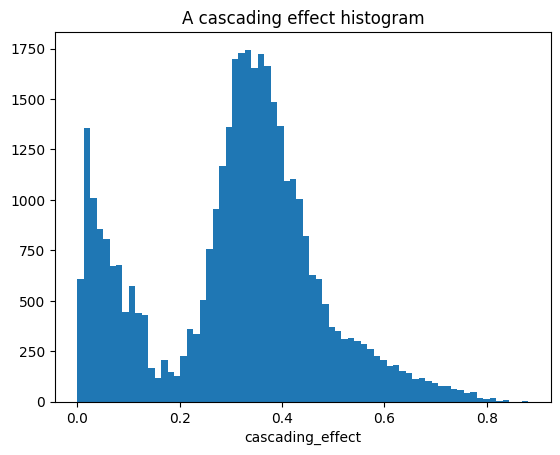

In [94]:
plt.hist(dataset.Cascading_effect, bins =70)
plt.title('A cascading effect histogram')
plt.xlabel('cascading_effect')

Text(0.5, 0, 'Load_shedding')

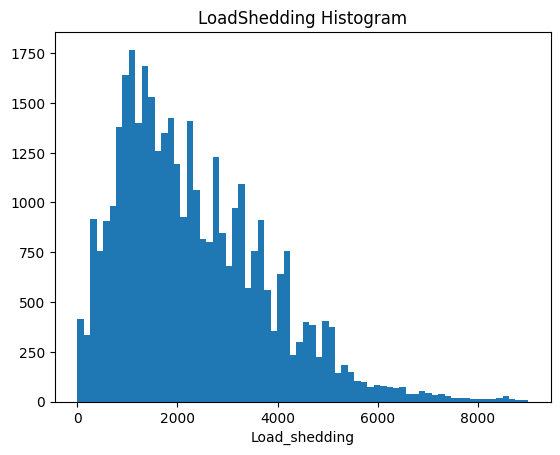

In [95]:
plt.hist(dataset.Loadshed,bins =70,cumulative=False,histtype='bar')
plt.title('LoadShedding Histogram')
plt.xlabel('Load_shedding')

Text(0.5, 0, 'Lines that fail because of a cascade')

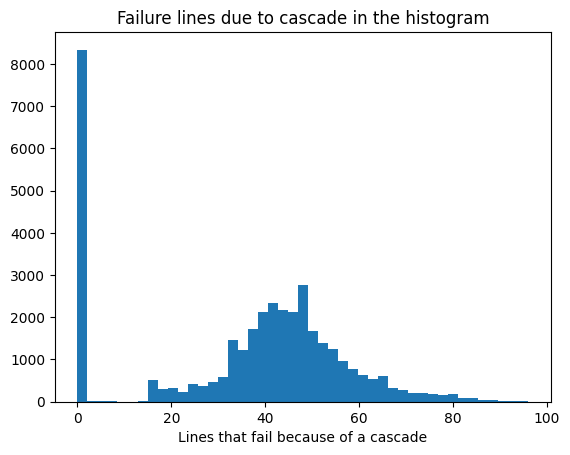

In [96]:
plt.hist(dataset.Failed_lines_due_to_cascade,bins =45)
plt.title('Failure lines due to cascade in the histogram')
plt.xlabel('Lines that fail because of a cascade')

<Axes: title={'center': 'load-generation ratio vs Load-shedding'}, xlabel='Load_generation_ratio', ylabel='Loadshed'>

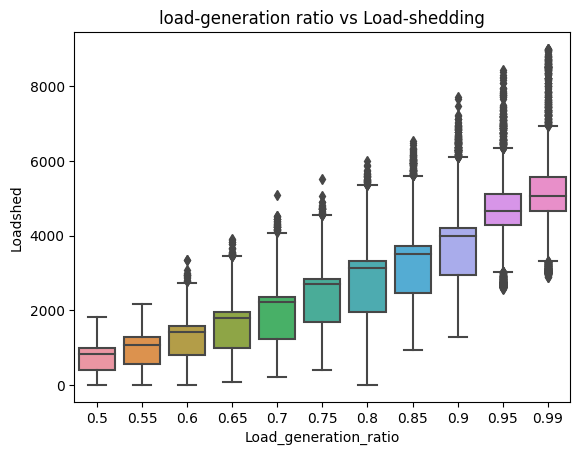

In [97]:
plt.title('load-generation ratio vs Load-shedding')
sns.boxplot(y = 'Loadshed', x ='Load_generation_ratio', data=dataset)

<Axes: title={'center': ' load-generation ratio vs Line failures'}, xlabel='Load_generation_ratio', ylabel='Failed_lines_due_to_cascade'>

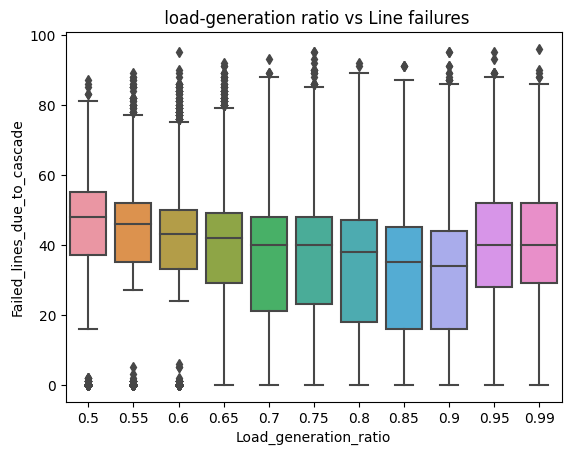

In [98]:
plt.title(' load-generation ratio vs Line failures')
sns.boxplot(y = 'Failed_lines_due_to_cascade', x ='Load_generation_ratio', data=dataset)

Text(0.5, 1.0, 'Installed_capacity vs cascading_effect')

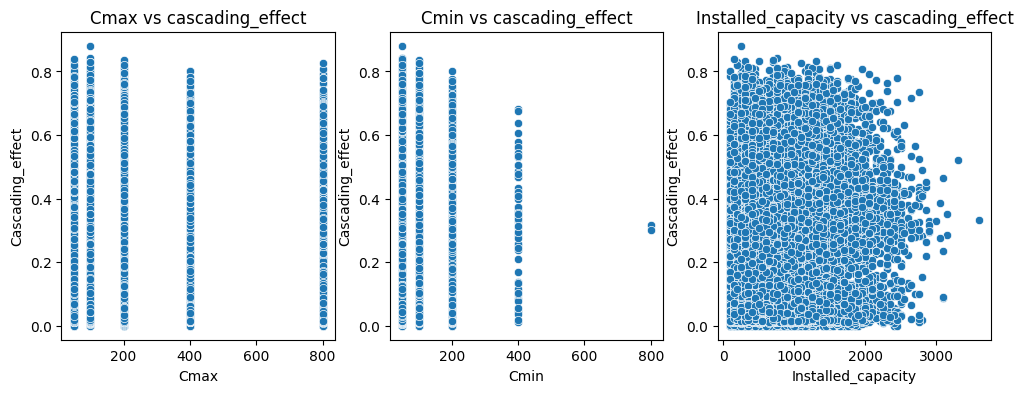

In [99]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x=dataset.Cmax,y=dataset.Cascading_effect)
plt.title('Cmax vs cascading_effect')
plt.subplot(1,3,2)
sns.scatterplot(x=dataset.Cmin, y=dataset.Cascading_effect)
plt.title('Cmin vs cascading_effect')
plt.subplot(1,3,3)
sns.scatterplot(x=dataset.Installed_capacity, y=dataset.Cascading_effect)
plt.title('Installed_capacity vs cascading_effect')


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37217 entries, 0 to 37216
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Intial_failed_lines          37217 non-null  int64  
 1   Cmax                         37217 non-null  int64  
 2   Cmin                         37217 non-null  int64  
 3   Load_shedding_constraint     37217 non-null  float64
 4   Load_generation_ratio        37217 non-null  float64
 5   Capacity_estimation_error    37217 non-null  float64
 6   Degree                       37217 non-null  float64
 7   Distance                     37217 non-null  float64
 8   Installed_capacity           37217 non-null  int64  
 9   Loadshed                     37217 non-null  int64  
 10  Human_error_Probability      37217 non-null  float64
 11  Generation                   37217 non-null  float64
 12  Alpha                        37217 non-null  float64
 13  Failed_lines_due

<Axes: >

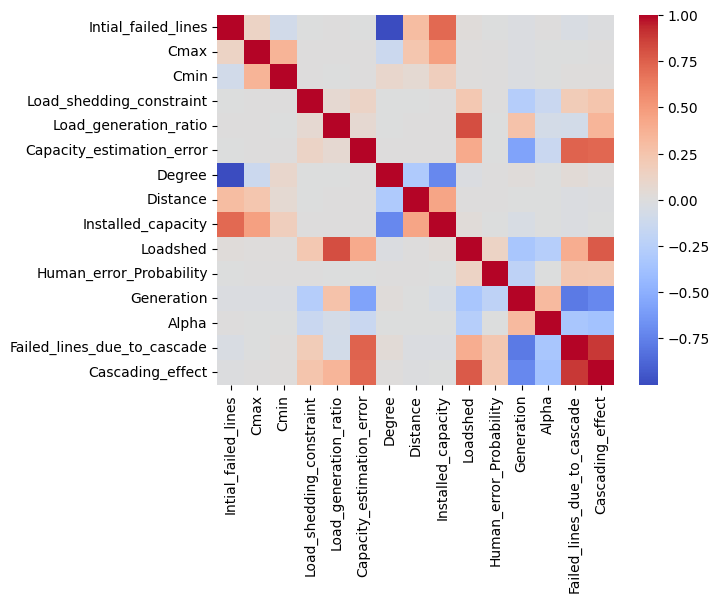

In [101]:
sns.heatmap(dataset.corr(),cmap ='coolwarm')

#  Logistic Regression:

In [102]:
dataset.columns

Index(['Intial_failed_lines', 'Cmax', 'Cmin', 'Load_shedding_constraint',
       'Load_generation_ratio', 'Capacity_estimation_error', 'Degree',
       'Distance', 'Installed_capacity', 'Loadshed', 'Human_error_Probability',
       'Generation', 'Alpha', 'Failed_lines_due_to_cascade',
       'Cascading_effect'],
      dtype='object')

In [103]:
dataset['Cascading?']= dataset.Cascading_effect>dataset.Cascading_effect.mean()
dataset['Cascading?'] = np.where(dataset['Cascading?'], '1', '0')

In [104]:
X =dataset[['Intial_failed_lines',  'Load_shedding_constraint',
       'Load_generation_ratio', 'Capacity_estimation_error','Human_error_Probability','Alpha',
            'Cmax','Installed_capacity','Degree',  'Distance']]
y = dataset['Cascading?']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.linear_model import LogisticRegression
model_Log = LogisticRegression()
model_Log.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
prediction = model_Log.predict(X_test)
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(prediction,y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Accuracy: 0.8523643202579259
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3130
           1       0.87      0.87      0.87      4314

    accuracy                           0.85      7444
   macro avg       0.85      0.85      0.85      7444
weighted avg       0.85      0.85      0.85      7444



In [105]:
from sklearn.model_selection import GridSearchCV

range_of_C_param = [0.001,0.01,0.1,1,10,100]
score =[]

accuracy = []
for i in range_of_C_param:
    lr = LogisticRegression(penalty = 'l2',C = i)
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    score.append((i,accuracy_score(y_test, y_pred)))
    accuracy.append(accuracy_score(y_test, y_pred))

score

[(0.001, 0.8514239656098872),
 (0.01, 0.8516926383664697),
 (0.1, 0.8522299838796346),
 (1, 0.8523643202579259),
 (10, 0.8522299838796346),
 (100, 0.8522299838796346)]

# k-Nearest-Neighbors

In [106]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("Accuracy:",accuracy_score(prediction,y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Accuracy: 0.846856528747985
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3130
           1       0.87      0.87      0.87      4314

    accuracy                           0.85      7444
   macro avg       0.84      0.84      0.84      7444
weighted avg       0.85      0.85      0.85      7444



In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_jobs=-1)
params = {'n_neighbors':[5,10],
          'leaf_size':[1,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto'],
          'n_jobs':[-1]}
model = GridSearchCV(model, param_grid=params, n_jobs=1)
model.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model.best_params_)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.8566630843632456
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3130
           1       0.87      0.88      0.88      4314

    accuracy                           0.86      7444
   macro avg       0.85      0.85      0.85      7444
weighted avg       0.86      0.86      0.86      7444



# Decision tree

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model= DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Accuracy: 0.8331542181622783
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3130
           1       0.85      0.86      0.86      4314

    accuracy                           0.83      7444
   macro avg       0.83      0.83      0.83      7444
weighted avg       0.83      0.83      0.83      7444



In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model= DecisionTreeClassifier(random_state=1234)
params = {'max_features': ['auto',],
          'min_samples_split': [5,10,15], 
          'min_samples_leaf':[5,10],
          'criterion' :['gini', 'entropy'], 
          }
model = GridSearchCV(model, param_grid=params, n_jobs=1)
model.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model.best_params_)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 5}
Accuracy: 0.8444384739387426
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3130
           1       0.86      0.87      0.87      4314

    accuracy                           0.84      7444
   macro avg       0.84      0.84      0.84      7444
weighted avg       0.84      0.84      0.84      7444



# Support vector machines 

In [110]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

Accuracy: 0.8725147770016121
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3130
           1       0.88      0.90      0.89      4314

    accuracy                           0.87      7444
   macro avg       0.87      0.87      0.87      7444
weighted avg       0.87      0.87      0.87      7444



In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
model=svm.SVC()
params = {'C': [0.1,1,5], 
          'kernel': ['linear','rbf']}
model = GridSearchCV(model, param_grid=params, n_jobs=1)
model.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model.best_params_)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'C': 5, 'kernel': 'rbf'}
Accuracy: 0.8727834497581946
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3130
           1       0.88      0.90      0.89      4314

    accuracy                           0.87      7444
   macro avg       0.87      0.87      0.87      7444
weighted avg       0.87      0.87      0.87      7444



# Random Forest 

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

Accuracy: 0.8756045137023106
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3130
           1       0.89      0.90      0.89      4314

    accuracy                           0.88      7444
   macro avg       0.87      0.87      0.87      7444
weighted avg       0.88      0.88      0.88      7444



In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
params = {'criterion':['gini','entropy'],
          'n_estimators':[50],
          'min_samples_leaf':[5,10],
          'min_samples_split':[5,10]}
model = GridSearchCV(model, param_grid=params)
model.fit(X_train, y_train)
print("Best Hyper Parameters:\n",model.best_params_)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8768135411069318
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3130
           1       0.89      0.90      0.89      4314

    accuracy                           0.88      7444
   macro avg       0.87      0.87      0.87      7444
weighted avg       0.88      0.88      0.88      7444



# Neural network

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
classifier = Sequential()
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu', input_dim=10))
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=1000, epochs=50)
y_pred_prob = classifier.predict(X_test)
y_pred = (y_pred_prob.ravel() > 0.5).astype(int)  
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Epoch 1/50
30/30 [==============================] - 2s 4ms/step - loss: 0.6919 - accuracy: 0.5742
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5771
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5771
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.5992
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.7487
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.7950
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.8025
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.8113
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8236
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8382
Epoch 11/50
30/30 [

In [115]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))    
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 1000, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1000],
              'epochs': [100],
              'optimizer': ['adam']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5909
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6033
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.7156
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.7841
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7947
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.7936
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7937
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7931
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.7935
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.7955
Epoch 11/

In [116]:
print (best_accuracy)
print(best_parameters)

0.8632318810291156
{'batch_size': 1000, 'epochs': 100, 'optimizer': 'adam'}


# Adaboost

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
clf = AdaBoostClassifier(n_estimators=200,learning_rate =1)
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

Accuracy: 0.8651262761955938
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      3130
           1       0.87      0.90      0.89      4314

    accuracy                           0.87      7444
   macro avg       0.86      0.86      0.86      7444
weighted avg       0.86      0.87      0.86      7444



In [118]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
clf = AdaBoostClassifier()
params = {'n_estimators':[100,200],
          'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate':[.5,1,2]}
clf1 = GridSearchCV(clf, param_grid=params, n_jobs=1)
clf1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",clf1.best_params_)
prediction=clf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}
Accuracy: 0.8662009672219237
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      3130
           1       0.87      0.90      0.89      4314

    accuracy                           0.87      7444
   macro avg       0.86      0.86      0.86      7444
weighted avg       0.87      0.87      0.87      7444



# Random forest regression

r-squared: 0.9303632071159103
MAE: 0.029884170037645378
MSE: 0.0018701423988841891
RMSE: 0.04324514306698718


Text(0.5, 0, 'Test data')

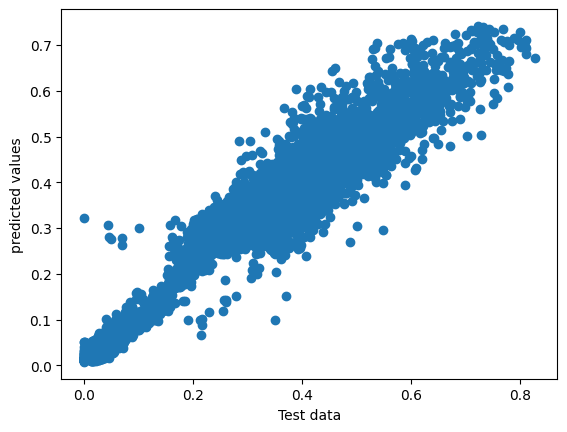

In [120]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
X =dataset[['Intial_failed_lines',  'Load_shedding_constraint',
       'Load_generation_ratio', 'Capacity_estimation_error','Human_error_Probability','Alpha',
            'Cmax','Installed_capacity','Degree',  'Distance']]
y = dataset['Cascading_effect']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)  
 
rfr = RandomForestRegressor(n_estimators = 300, min_samples_split=10,
    min_samples_leaf=10) 
rfr.fit(X_train, y_train) 
predictions = rfr.predict(X_test)
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
scat= plt.scatter(y_test,predictions)
plt.ylabel('predicted values')
plt.xlabel('Test data')


# linear regression

In [121]:

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r-squared: 0.7265914450632047
MAE: 0.06974425517208538
MSE: 0.007342568628282997
RMSE: 0.08568878939676412


# Ridge

In [122]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import metrics
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)
predictions = ridge.predict(X_test)
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r-squared: 0.7267314043041426
MAE: 0.06975150510425285
MSE: 0.007338809929759512
RMSE: 0.08566685432394207


# Lasso

In [123]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import metrics
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
predictions = ridge.predict(X_test)
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r-squared: 0.7267314043041426
MAE: 0.06975150510425285
MSE: 0.007338809929759512
RMSE: 0.08566685432394207


# Support vector regression

In [124]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import metrics
svr = SVR()
svr.fit(X_train,y_train)
predictions = svr.predict(X_test)
print('r-squared:', r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r-squared: 0.8539337215527617
MAE: 0.05036245849417694
MSE: 0.0039227070785135985
RMSE: 0.06263151825170454
